<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_7/Galaxy_ZooII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings('ignore')


In [0]:
import io, requests, zipfile


url_x = "https://www.dropbox.com/s/optw30o55q6mxlw/Cropped%26resized_GS_100_10000_withlabels.npz?dl=1"
url_y = 'https://www.dropbox.com/s/ctjjap42qilhu9s/Y_1.csv?dl=1'

### This file contains classes and the ids. 
s=requests.get(url_y, stream=True).content
df = pd.read_csv(io.BytesIO(s), index_col=0) 

### This file contains images and the ids. 
s=requests.get(url_x, stream=True).content
# d = np.load(io.BytesIO(s))
X, ids = [np.load(io.BytesIO(s))[f] for f in ['imgs','ids']]
ids = ids.astype('float')
X = X/255

### We can make the labels based on the ids in the X file.
Y = df.loc[ids].values
print(Y.shape)

(10000, 3)


In [0]:
Y_c = np.argmax(Y,axis=1)
n_w, n_h = X[0].shape
n_f = n_w*n_h

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, test_size=.25 )
X_c_train, X_c_test, Y_c_train, Y_c_test = train_test_split(X,Y_c, random_state=0, test_size=.25 )

In [0]:
X_train = X_train.reshape(-1, n_w, n_h, 1)
X_test = X_test.reshape(-1, n_w, n_h, 1)

X_c_train = X_c_train.reshape(-1, n_w, n_h, 1)
X_c_test = X_c_test.reshape(-1, n_w, n_h, 1)

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(n_w , n_h, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 16)        592       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv

In [0]:
Y_c_test.shape

(2500,)

In [0]:
%%time
from keras import optimizers, losses

model.compile(optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), #'adam', 
              loss=losses.mean_squared_error, #'categorical_crossentropy',
              metrics=['accuracy'])

# opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# model.optimizer = opt

# model.loss=losses.mean_squared_error


history = model.fit(X_train, Y_train, epochs=200, batch_size=256, 
         validation_data = (X_test, Y_test),
          verbose = 1
         )

Instructions for updating:
Use tf.cast instead.
Train on 7500 samples, validate on 2500 samples
Epoch 1/200
7500/7500 [==============================] - 4s 520us/step - loss: 0.0842 - acc: 0.5559 - val_loss: 0.0625 - val_acc: 0.5624
Epoch 2/200
7500/7500 [==============================] - 1s 129us/step - loss: 0.0573 - acc: 0.5600 - val_loss: 0.0570 - val_acc: 0.5624
Epoch 3/200
7500/7500 [==============================] - 1s 129us/step - loss: 0.0556 - acc: 0.5600 - val_loss: 0.0567 - val_acc: 0.5624
Epoch 4/200
7500/7500 [==============================] - 1s 129us/step - loss: 0.0556 - acc: 0.5600 - val_loss: 0.0565 - val_acc: 0.5624
Epoch 5/200
7500/7500 [==============================] - 1s 129us/step - loss: 0.0555 - acc: 0.5600 - val_loss: 0.0564 - val_acc: 0.5624
Epoch 6/200
7500/7500 [==============================] - 1s 129us/step - loss: 0.0551 - acc: 0.5600 - val_loss: 0.0562 - val_acc: 0.5624
Epoch 7/200
7500/7500 [==============================] - 1s 129us/step - loss: 0.0

Loss and Accuracy on the training data are: [0.029080699121952058, 0.7904]


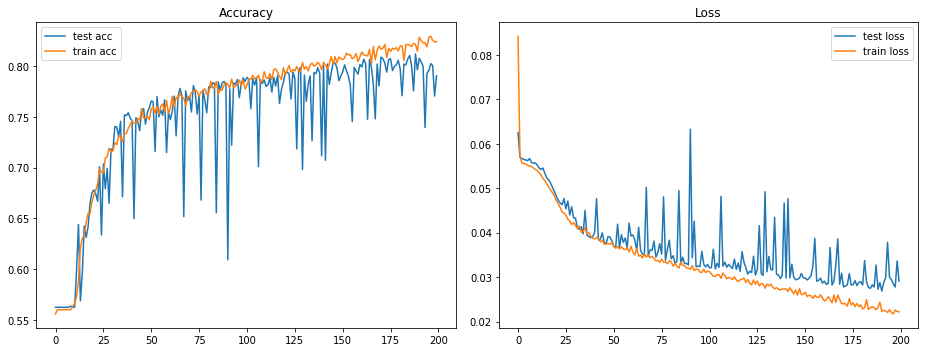

In [0]:
print('Loss and Accuracy on the training data are: {}'.format(model.evaluate(X_test, Y_test, verbose=0)))

fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()


In [0]:
model.load_weights('Primary_model_l2_sgd_lr01.h5')

In [0]:
from google.colab import files
model.save('Primary_model_l2_sgd_lr01.model')

### More models

Dropout

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(n_w , n_h, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(3, activation='softmax'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 4)         40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 4)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 16)        592       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
___________________________

In [0]:
%%time
model.compile(optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True), 
              loss='mean_squared_error',
              metrics=['accuracy'])



history = model.fit(X_train, Y_train, epochs=500, batch_size=256, 
         validation_data = (X_test, Y_test),
          verbose = 0
         )

CPU times: user 6min 19s, sys: 1min 9s, total: 7min 28s
Wall time: 7min 59s


Loss and Accuracy on the training data are: [0.02164304077923298, 0.8304]


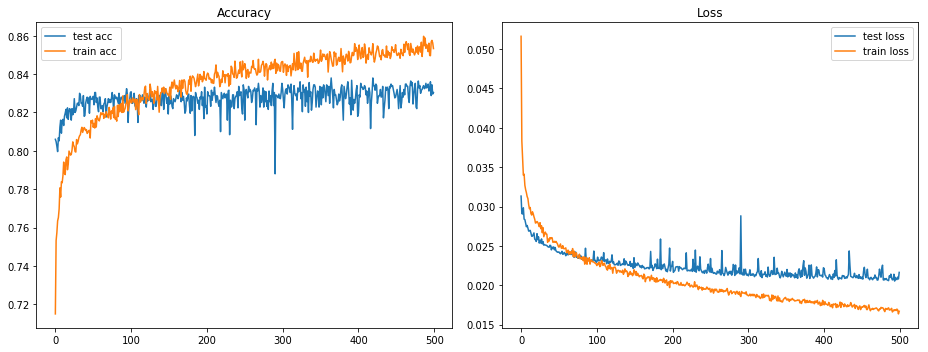

In [0]:
print('Loss and Accuracy on the training data are: {}'.format(model.evaluate(X_test, Y_test, verbose=0)))

fig = plt.figure(figsize=(13, 5))
ax  = fig.add_subplot(1,2,1, title='Accuracy')
plt.plot(history.history['val_acc'], label = 'test acc')
plt.plot(history.history['acc'], label = 'train acc')
plt.legend(loc=0)

ax  = fig.add_subplot(1,2,2, title='Loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.legend(loc=0)

plt.tight_layout()
plt.show()


In [0]:
model.save('Primary_model_l2_sgd_lr001_do05.h5')

### Pretrained Model